In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# google.colab import files
#uploaded = files.upload()

In [4]:
#import io
#df_merc = pd.read_csv(io.BytesIO(uploaded['merc.csv']))

In [5]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [7]:
df_merc= pd.read_csv('/content/drive/MyDrive/Data-Science-project-files/uk used cars/merc.csv')

PEARSON CORRELATION 


In [8]:
pearsoncorr = df_merc.corr(method='pearson')
pearsoncorr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


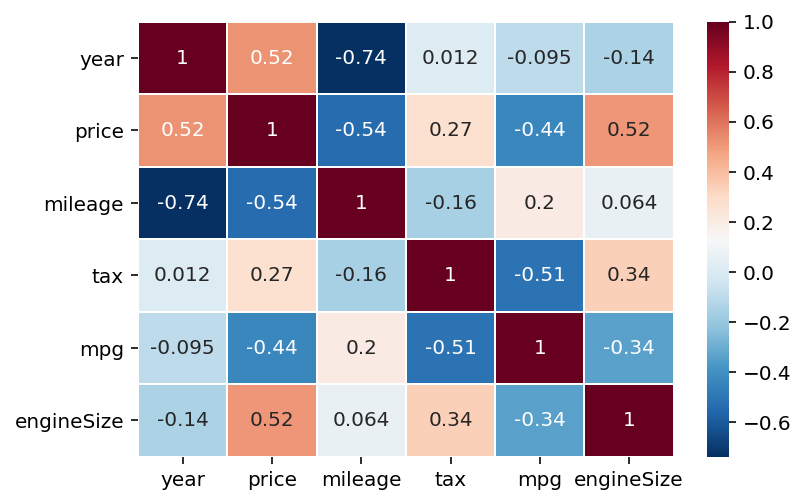

In [9]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

MERCEDES DATA ANALYSIS

In [10]:
df_merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [11]:
df_merc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13119 entries, 0 to 13118
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13119 non-null  object 
 1   year          13119 non-null  int64  
 2   price         13119 non-null  int64  
 3   transmission  13119 non-null  object 
 4   mileage       13119 non-null  int64  
 5   fuelType      13119 non-null  object 
 6   tax           13119 non-null  int64  
 7   mpg           13119 non-null  float64
 8   engineSize    13119 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.6+ KB


In [12]:
df_merc.shape

(13119, 9)

In [13]:
sum(df_merc.duplicated())

259

In [14]:
df_merc.drop_duplicates(inplace = True)

In [15]:
sum(df_merc.duplicated())

0

In [16]:
df_merc.describe()

,year,price,mileage,tax,mpg,engineSize
count,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000,12860.000000
mean,2017.267963,24636.426361,22169.588336,129.843701,55.197535,2.075381
std,2.226127,11874.220447,21077.039295,65.580514,15.181133,0.573434
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17309.750000,6494.000000,125.000000,45.600000,1.800000
50%,2018.000000,22299.000000,15448.500000,145.000000,56.500000,2.000000
75%,2019.000000,28971.250000,32000.000000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [17]:
df_merc.loc[:, df_merc.isnull().any()].columns  #Check for missing values

Index([], dtype='object')

MILEAGE 

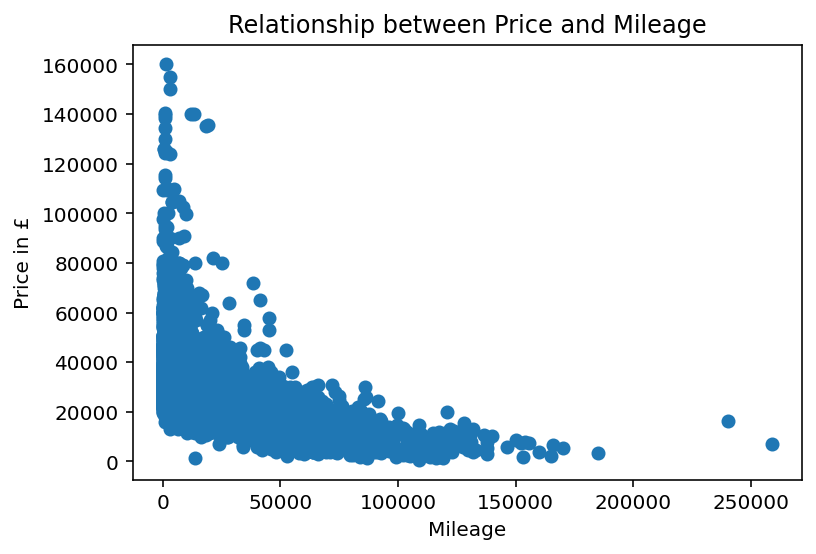

In [18]:
x = df_merc['mileage']
plt.xlabel('Mileage')
y = df_merc ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

In [19]:
df_merc.drop(df_merc[df_merc['mileage']>200000].index, inplace = True)   #removal of identified outlier

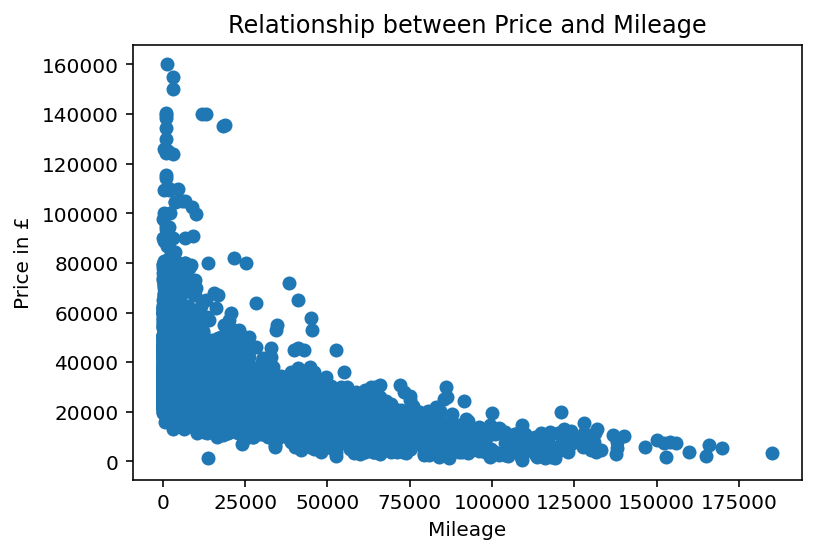

In [20]:
x = df_merc['mileage']
plt.xlabel('Mileage')
y = df_merc ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

TAX

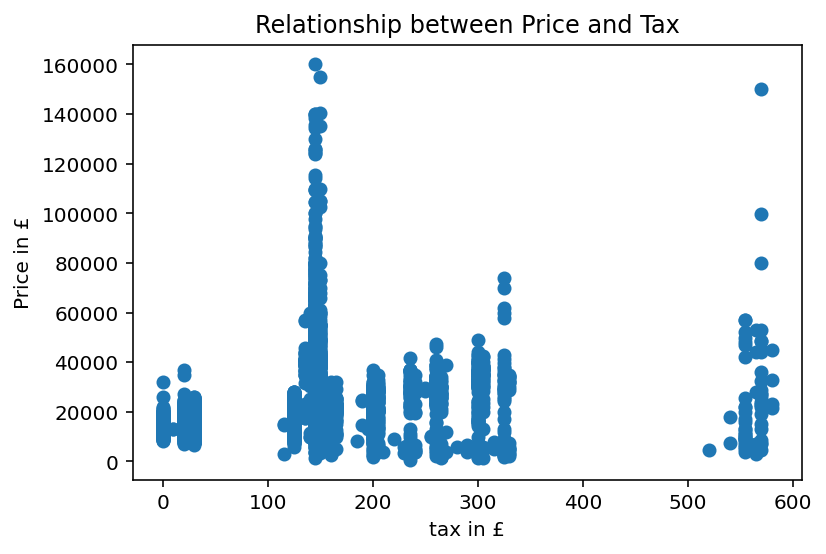

In [21]:
x = df_merc['tax']
plt.xlabel('tax in £')
y = df_merc['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Tax')
plt.show()

MILES PER GALLON

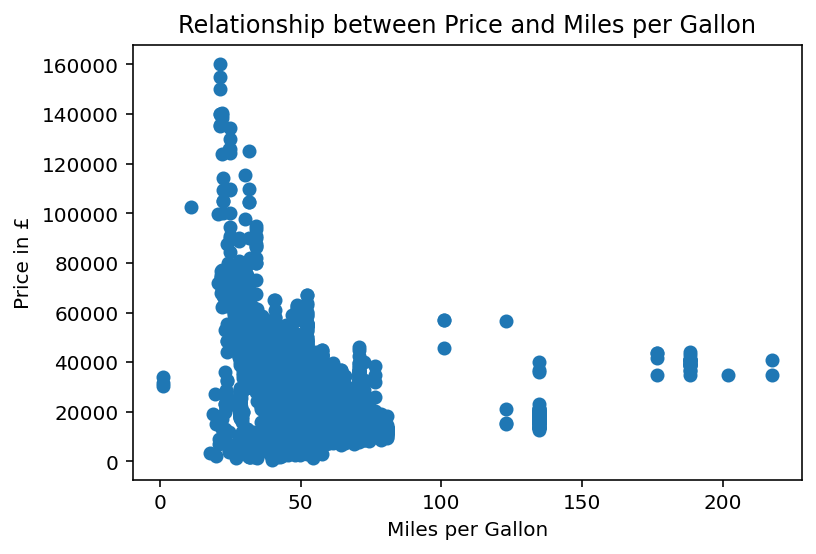

In [22]:
x = df_merc['mpg']
plt.xlabel('Miles per Gallon')
y = df_merc['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Miles per Gallon')
plt.show()

In [23]:
miles_pg= df_merc.loc[:, ['mpg', 'price']] 

In [24]:
miles_pg.head()

,mpg,price
0,32.1,5200
1,61.4,34948
2,28.0,49948
3,30.4,61948
4,30.1,73948


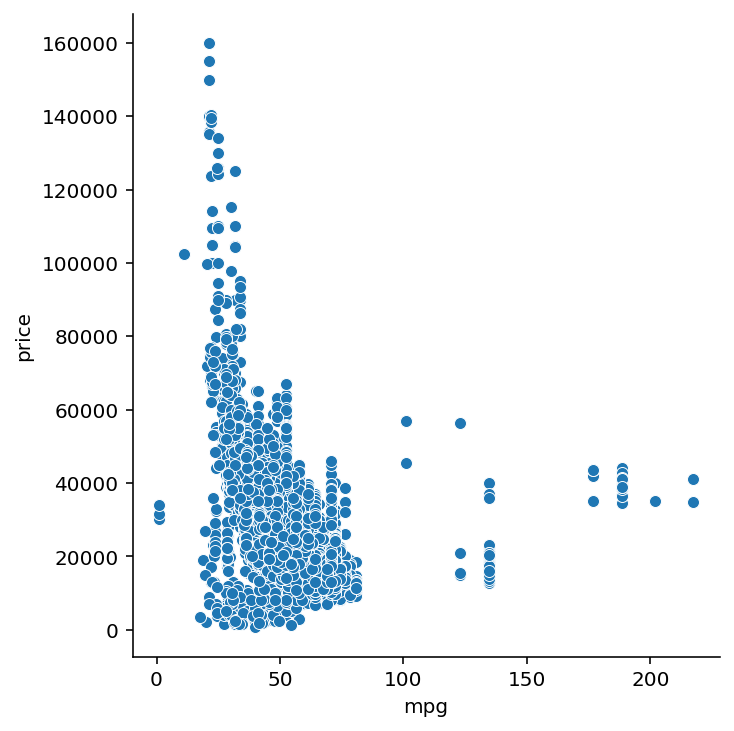

In [25]:
sns.relplot(x="mpg", y="price", data=miles_pg);

ENGINE SIZE 

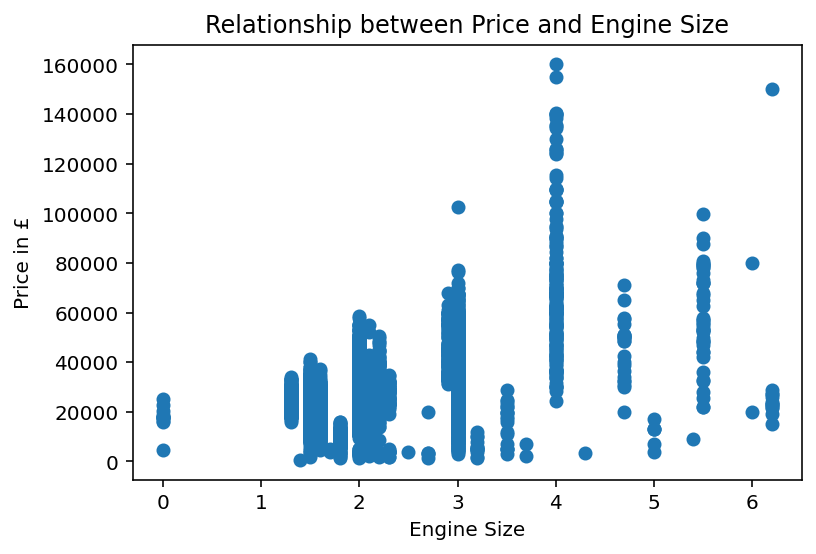

In [26]:
x = df_merc['engineSize']
plt.xlabel('Engine Size')
y = df_merc['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Engine Size')
plt.show()

FUEL TYPE

In [27]:
df_merc.loc[:, ['fuelType', 'price']]

,fuelType,price
0,Petrol,5200
1,Hybrid,34948
2,Petrol,49948
3,Petrol,61948
4,Petrol,73948
...,...,...
13114,Diesel,35999
13115,Diesel,24699
13116,Diesel,30999
13117,Diesel,37990


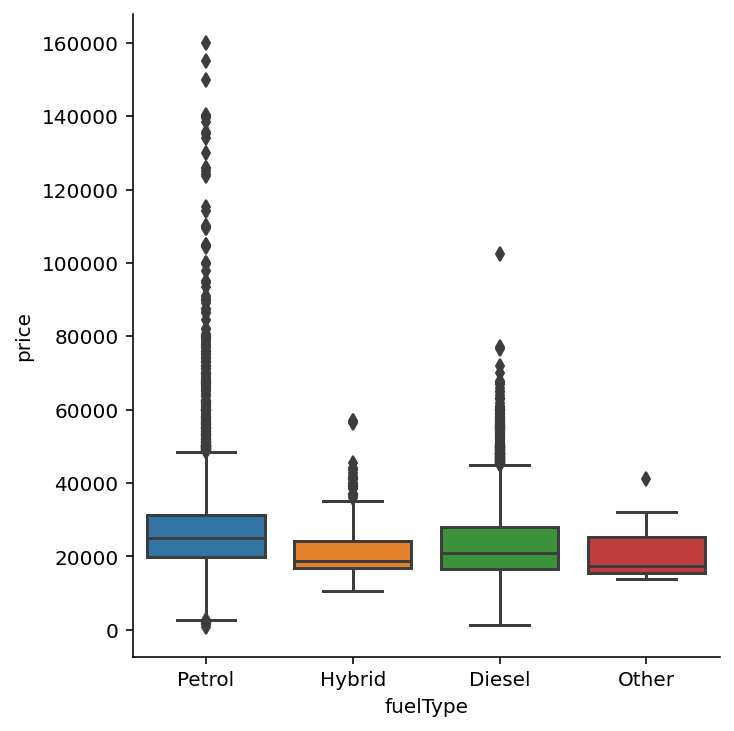

In [28]:
sns.catplot(x="fuelType", y="price", kind="box", data= df_merc);

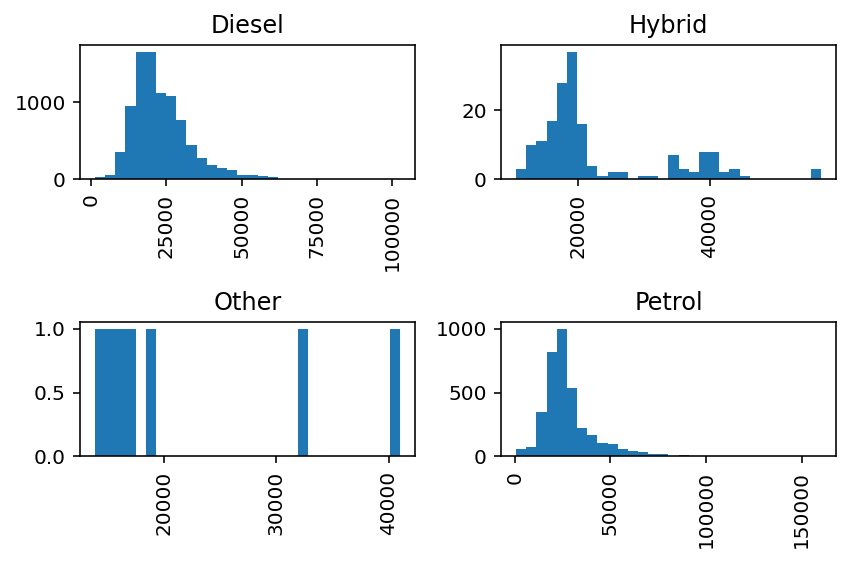

In [29]:
df_merc.hist(by='fuelType', column='price', bins=30)
plt.tight_layout()
plt.show()


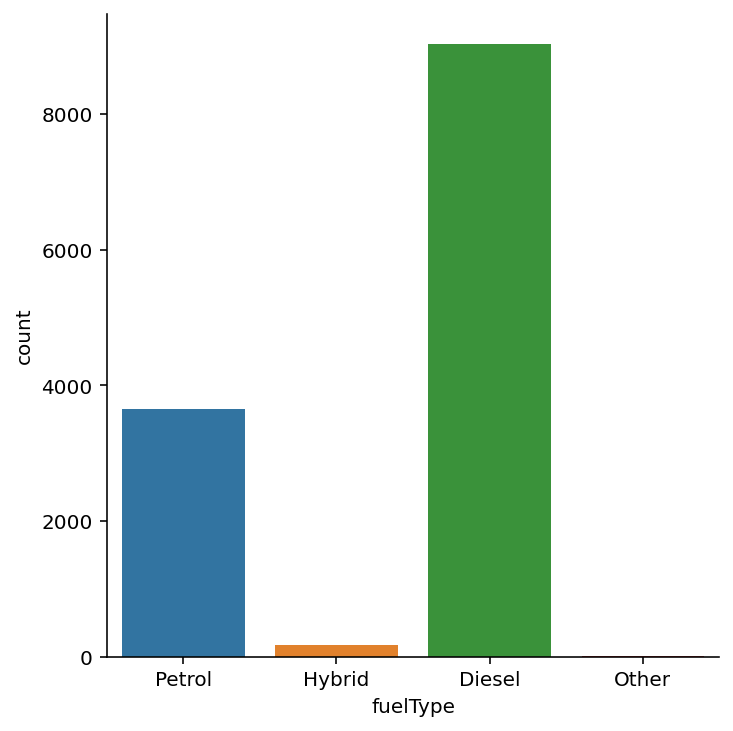

In [30]:
sns.catplot(x="fuelType", kind="count", data=df_merc);   #calculated frequency of each fuel type 

TRANSMISSION

In [31]:
df_merc.loc[:, ['transmission', 'price']]

,transmission,price
0,Automatic,5200
1,Automatic,34948
2,Automatic,49948
3,Automatic,61948
4,Automatic,73948
...,...,...
13114,Automatic,35999
13115,Automatic,24699
13116,Automatic,30999
13117,Automatic,37990


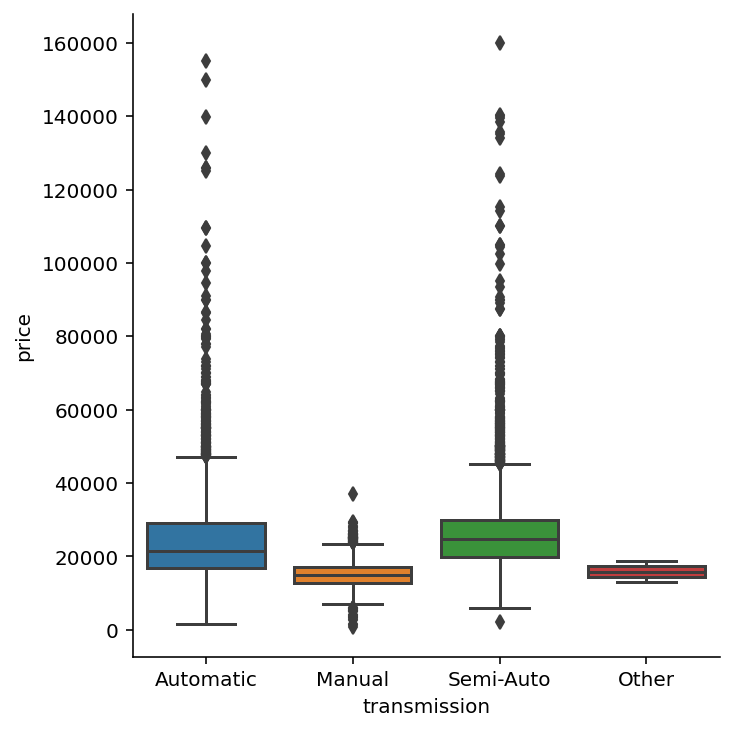

In [32]:
sns.catplot(x="transmission", y="price", kind="box", data= df_merc);

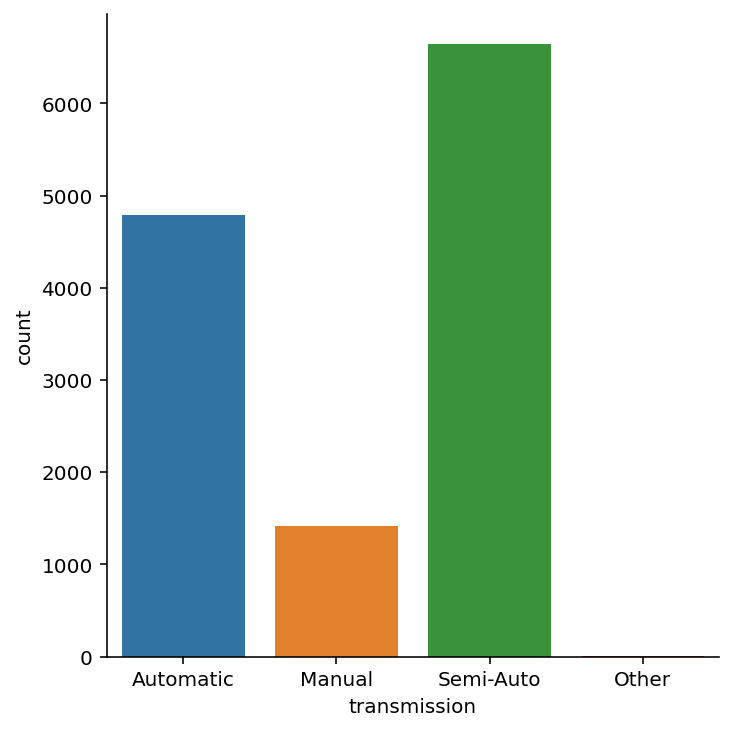

In [33]:
sns.catplot(x="transmission", kind="count", data=df_merc);

MODEL

In [34]:
df_merc.loc[:, ['model', 'price']]

,model,price
0,SLK,5200
1,S Class,34948
2,SL CLASS,49948
3,G Class,61948
4,G Class,73948
...,...,...
13114,C Class,35999
13115,B Class,24699
13116,GLC Class,30999
13117,CLS Class,37990


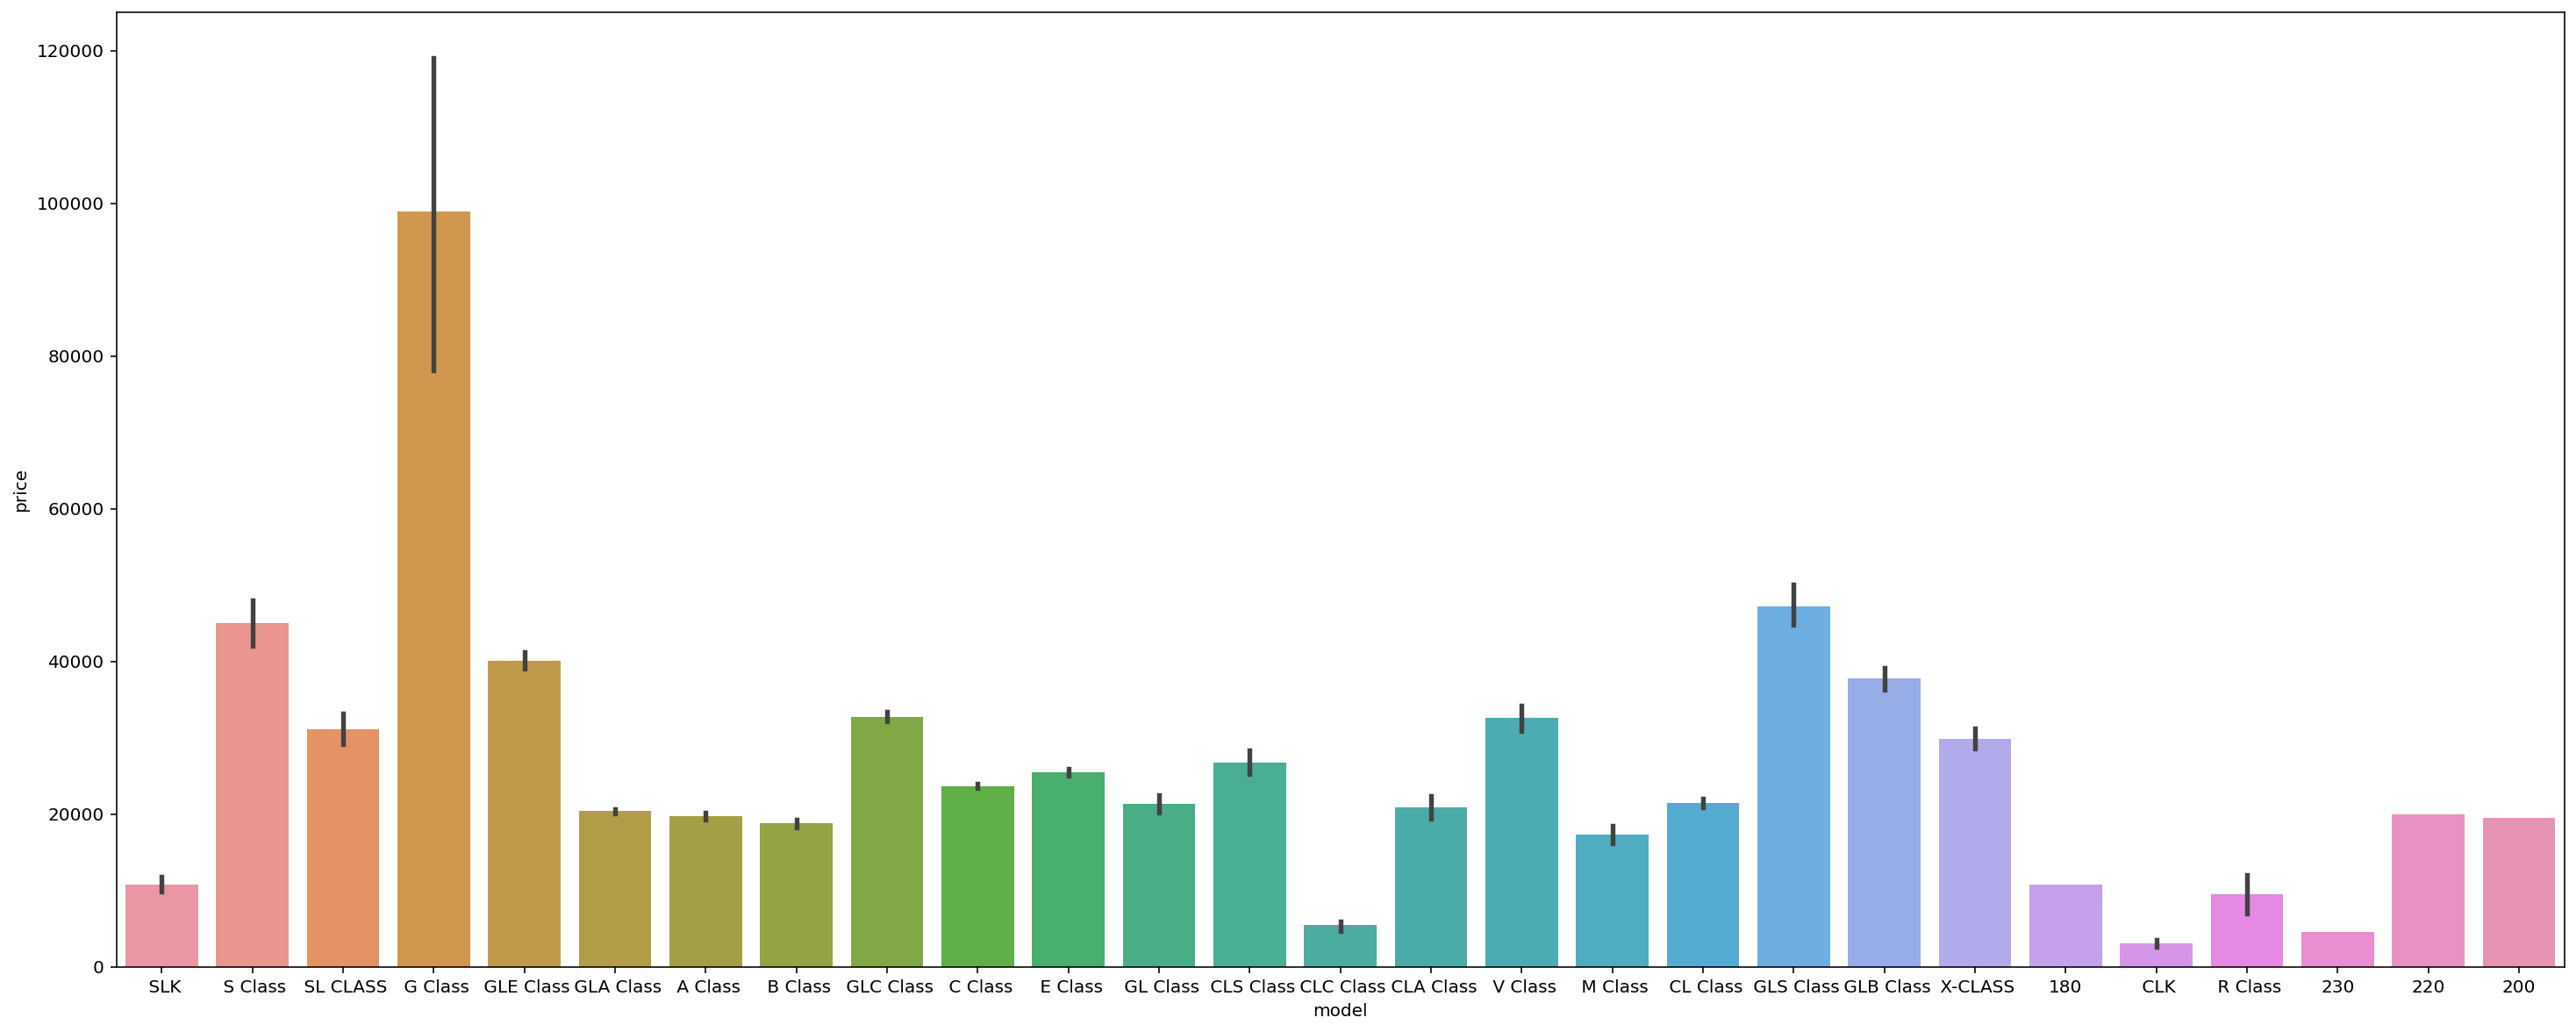

In [35]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "model", y = "price", ax=ax, data=df_merc)
plt.show()

**Machine Learning**

In [36]:
from sklearn.model_selection import train_test_split  

In [37]:
from sklearn import preprocessing ### library --mathematicalfunction-- min-max -scalar to import 

In [38]:
from sklearn.preprocessing import MinMaxScaler            ### column of data with different vaue..uniform the data-..normalization...
from sklearn.preprocessing import PolynomialFeatures

In [39]:
from sklearn.linear_model import Ridge               ##### mathematical function.. square functiom...error...
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR         
from sklearn.feature_selection import SelectKBest, f_regression   
from sklearn.ensemble import RandomForestRegressor   
from sklearn.neural_network import MLPRegressor   

In [40]:
merc = df_merc

In [41]:
merc.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0


In [42]:
merc.shape

(12858, 9)

In [43]:
merc.drop_duplicates()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,SLK,2005,5200,Automatic,63000,Petrol,325,32.1,1.8
1,S Class,2017,34948,Automatic,27000,Hybrid,20,61.4,2.1
2,SL CLASS,2016,49948,Automatic,6200,Petrol,555,28.0,5.5
3,G Class,2016,61948,Automatic,16000,Petrol,325,30.4,4.0
4,G Class,2016,73948,Automatic,4000,Petrol,325,30.1,4.0
...,...,...,...,...,...,...,...,...,...
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0


In [44]:
merc.loc[:, merc.isnull().any()].columns

Index([], dtype='object')

In [45]:
merc.replace([np.inf, -np.inf], np.nan, inplace=True)  ###Using this code because of Error :  Input contains NaN, infinity or a value too large for dtype('float64')


In [46]:
merc = merc.reset_index()

In [47]:
merc = merc.replace('?', np.NaN)

In [48]:
print(merc.model.unique()) #categorical features
print(merc.transmission.unique())
print(merc.fuelType.unique())

[' SLK' ' S Class' ' SL CLASS' ' G Class' ' GLE Class' ' GLA Class'
 ' A Class' ' B Class' ' GLC Class' ' C Class' ' E Class' ' GL Class'
 ' CLS Class' ' CLC Class' ' CLA Class' ' V Class' ' M Class' ' CL Class'
 ' GLS Class' ' GLB Class' ' X-CLASS' '180' ' CLK' ' R Class' '230' '220'
 '200']
['Automatic' 'Manual' 'Semi-Auto' 'Other']
['Petrol' 'Hybrid' 'Diesel' 'Other']


In [49]:
merc_model_data = merc[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]
merc_model_data.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,SLK,2005,Automatic,63000,Petrol,325,32.1,1.8,5200
1,S Class,2017,Automatic,27000,Hybrid,20,61.4,2.1,34948
2,SL CLASS,2016,Automatic,6200,Petrol,555,28.0,5.5,49948
3,G Class,2016,Automatic,16000,Petrol,325,30.4,4.0,61948
4,G Class,2016,Automatic,4000,Petrol,325,30.1,4.0,73948


In [50]:
merc_data_dummy = pd.get_dummies(merc_model_data) ###### dummies.. to have more number of CATEGORICAL features .. indexing
merc_data_dummy.head()
merc_data_dummy.shape

(12858, 41)

In [51]:
merc_data_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ A Class,model_ B Class,model_ C Class,model_ CL Class,model_ CLA Class,model_ CLC Class,model_ CLK,model_ CLS Class,model_ E Class,model_ G Class,model_ GL Class,model_ GLA Class,model_ GLB Class,model_ GLC Class,model_ GLE Class,model_ GLS Class,model_ M Class,model_ R Class,model_ S Class,model_ SL CLASS,model_ SLK,model_ V Class,model_ X-CLASS,model_180,model_200,model_220,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2005,63000,325,32.1,1.8,5200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,2017,27000,20,61.4,2.1,34948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,2016,6200,555,28.0,5.5,49948,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,2016,16000,325,30.4,4.0,61948,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,2016,4000,325,30.1,4.0,73948,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [71]:

X = merc_data_dummy.drop(['price'],axis=1)
y = merc_data_dummy['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Using xgboost for prediction**

In [69]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [72]:
model.fit(X_train,y_train)

[06:40:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [80]:
y_pred=model.predict(X_test)

In [75]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,33990,34463.417969
1,13532,13513.845703
2,19998,19615.019531
3,20400,20649.703125
4,36495,38762.382812


In [76]:
print(y_pred)

[34463.418 13513.846 19615.02  ... 15409.618 29748.402 30843.113]


**Other Methods**

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()  # It is to keep the features of numerical values into same range between 0 to 1 so that each feature plays an important role in prediction
merc_data_DS1 = min_max_scaler.fit_transform(merc_data_dummy.drop(columns= ['price']))  #USING fit_transform for scaling

In [53]:
merc_data_DS2 = pd.DataFrame(merc_data_DS1)#Here, we see all the 37 features scaled from 0 to 1. One additional unscaled price column converted from scaled price column.  
price = merc_model_data['price']        
frames = [merc_data_DS2,price]
merc_data_DS=pd.concat(frames,axis=1)
print(merc_data_DS.head())
print(merc_data_DS.shape)

      0         1         2         3         4  ...   36   37   38   39  price
0  0.70  0.340537  0.560345  0.143386  0.290323  ...  0.0  0.0  0.0  1.0   5200
1  0.94  0.145941  0.034483  0.278908  0.338710  ...  0.0  1.0  0.0  0.0  34948
2  0.92  0.033508  0.956897  0.124422  0.887097  ...  0.0  0.0  0.0  1.0  49948
3  0.92  0.086482  0.560345  0.135523  0.645161  ...  0.0  0.0  0.0  1.0  61948
4  0.92  0.021616  0.560345  0.134135  0.645161  ...  0.0  0.0  0.0  1.0  73948

[5 rows x 41 columns]
(12858, 41)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(merc_data_DS.drop(columns = ['price']),
                                                    merc_data_DS[['price']],
                                                    test_size = 0.2, random_state = 42)   ### what is random state? every time you run the data, its in the same run constant.. thumb rule::: 42... test size 0f 0.2 indicates that 20% of dataset were taken for testing. 

In [55]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(10286, 40)
(10286, 1)
(2572, 40)
(2572, 1)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

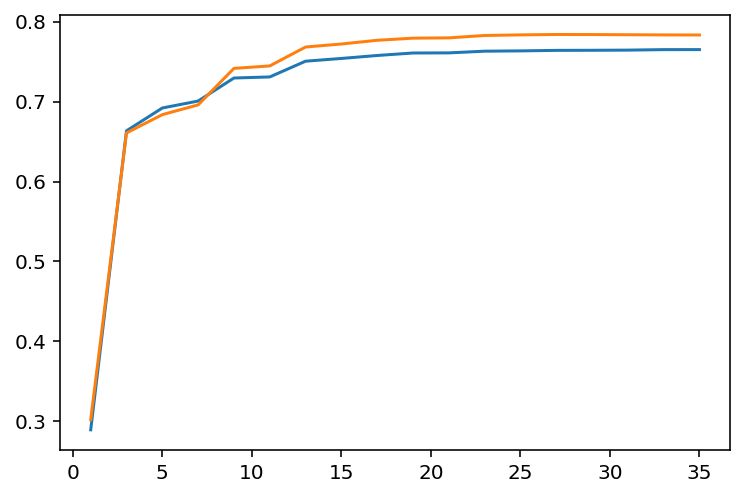

In [56]:
#evaluating best features

features = merc_data_DS.drop(columns = ['price']).columns

N = []                                                                   #NO. OF FEATURES 
r_squared_train = []
r_squared_test = []

for k in range(1, 37, 2): # 37 is because of 37 features, 1 is the initial, 2 is the step size
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [57]:
selector = SelectKBest(f_regression, k = 22)  ### k= 23 is the point where features of train and test are fitting 
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()] # Get a mask, or integer index, of the features selected Parameters. Gives the index of the best features found by highest k score. 

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 14, 16, 18, 19, 20, 23, 24, 25, 26, 33, 35,
       36, 39],
      dtype='object')

In [58]:
#linear

def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   #R2 generate based on test set
    
    return regressor, score

In [59]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.782085
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.165843
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.781375
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.030550
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.952622


In [60]:
#using polynomials
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(10286, 861)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

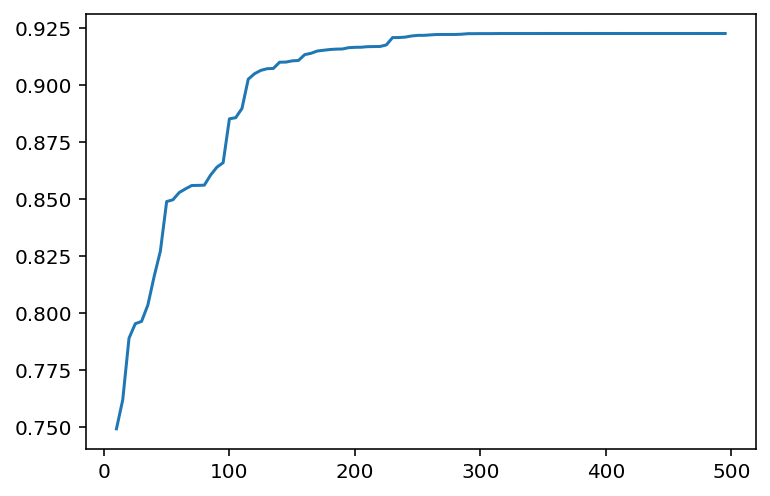

In [62]:
N = []   #no.of features
r_squared = []

for k in range(10, 500, 5): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [63]:
selector = SelectKBest(f_regression, k =250)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor(),]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.782085
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.165843
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.781375
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.030550
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.952622
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.883778
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.497017
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.875180
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.033894
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.945044


In [64]:
RF = RandomForestRegressor(n_estimators = 1000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly) #predicts the price using random forest regression using polynomial features.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [65]:
y_test = y_test.reset_index()
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [66]:
Comparison = y_test.join(y_pred_df) #Comparing the predicted price vs original price by joining them
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head(11)

,price,Price_prediction
0,33990,33550.459
1,13532,13697.254
2,19998,19898.198
3,20400,19814.690
4,36495,38596.050
5,16999,14904.410
6,20792,20375.897
7,18991,17733.995
8,27498,25434.733
9,28480,30231.043


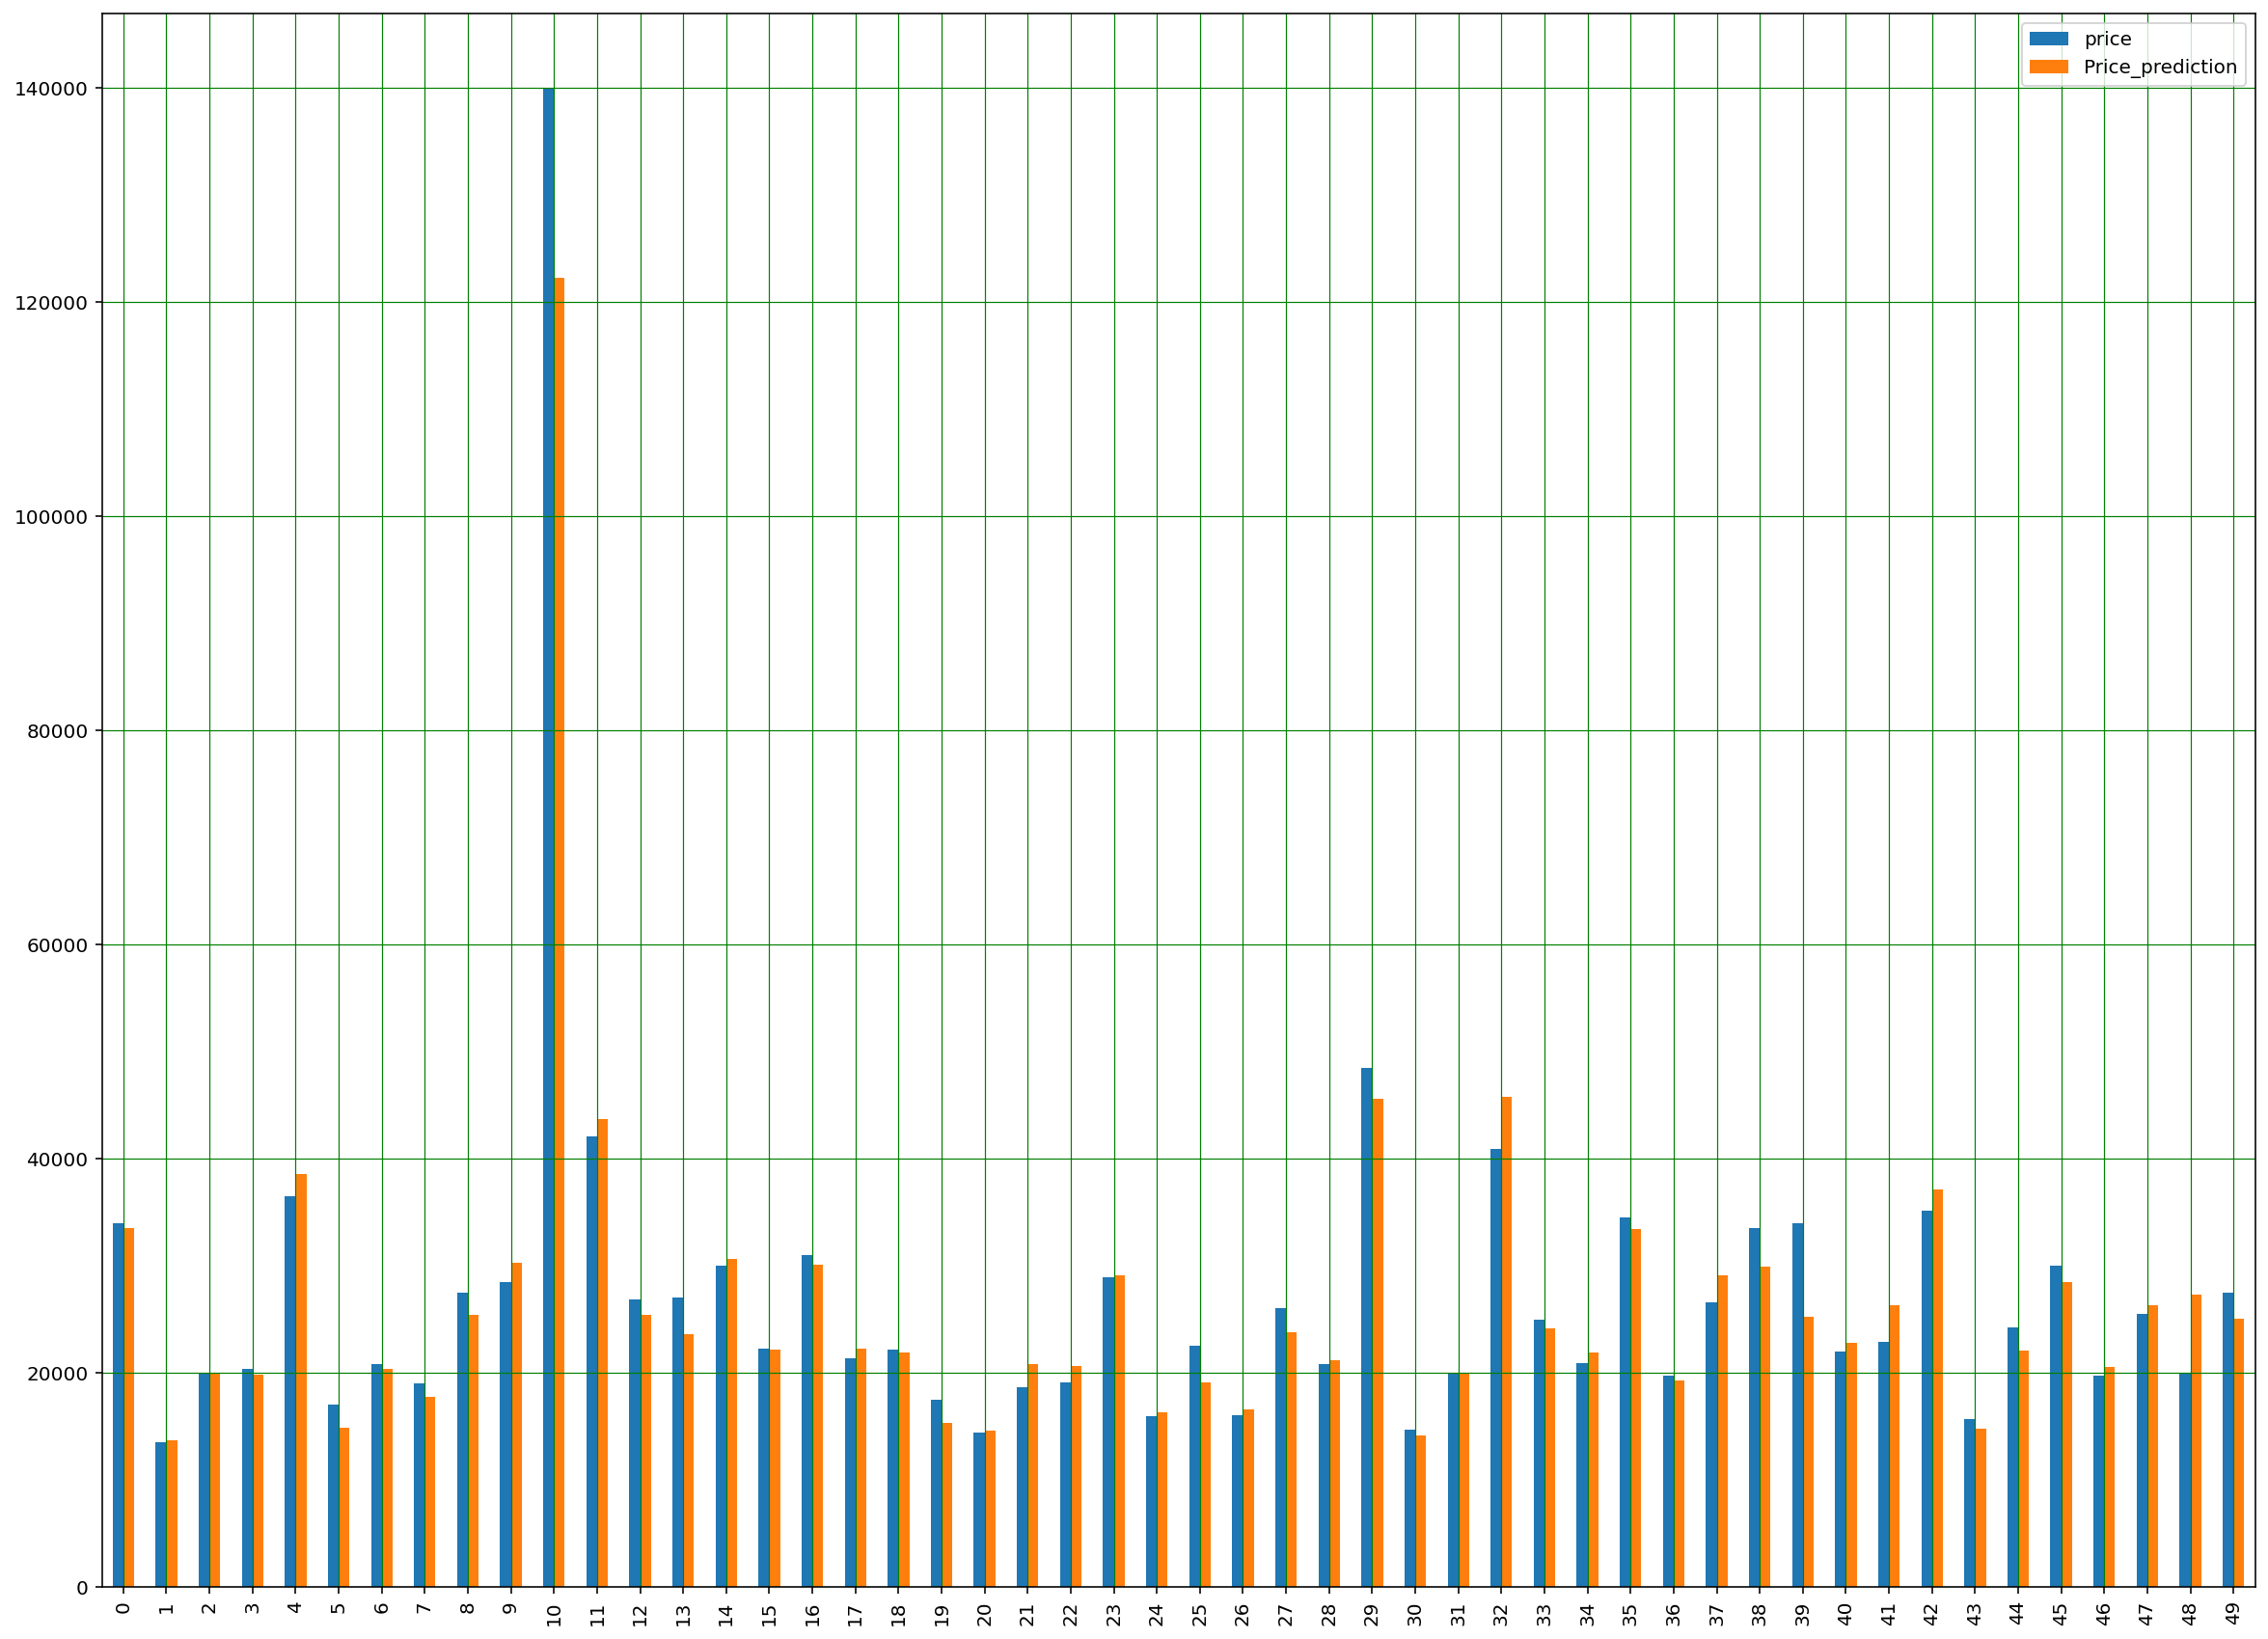

In [67]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()


In [68]:
plt.savefig('mercedes_prediction_vs_price.png')

<Figure size 432x288 with 0 Axes>